# Pre-lecture

# Question 1

The **standard deviation** is a measure of the amount of variation of the values of a variable about its mean. The larger the standard deviation is, the greater variability or spread in the data there is. 
<br>
<br> The **standard error of the mean** is the measure of the variablity of the sample mean if you were to repeatedly sample from the population. It captures the variation of the sample mean from the population mean. The standard erro of the mean decreases as the sample size increases because a larger sample can better estimate the population.
<br>
<br> **Differences:**
- Mathematically, for a given sample size, the standard error of the mean equals the standard deviation divided by the square root of the sample size. SEM will always be smaller than or equal to SD for a given dataset, since SEM reduces as the sample size increases.
- While the standard deviation describes the variration of the data points in the data itself, the standard error of the mean is a measure of the dispersion of sample means around the population mean. 
- Standard deviation is a property or descriptive statistics od the data, and standard error of the mean depends on both the standard deviation of the data and the sample size. 

# Question 2

<br> A confidence interval is created by calculating upper and lower bounds or confidence limits (error bound mean). Effectively, confidence intervals are a point estimate +- margin of error. For an upper and lower confidence limimt to be calculated, one must choose the desired α-leval, sample size, sample mean, and standard deviation.
<br>
<br>**Steps to Create the Confidence Interval:**
- Generate bootstrap samples from the original sample (by resampling with replacement). 
- Calculate the mean of bootstrap sample means
- Find the Z-score for 95% confidence: 1.96 (95% of the values in a standard normal distribution lie within 1.96 standard deviations of the mean)
- Compute the margin of error
<br> Margin of Error=1.96×SEM bootstrap
- Construct the confidence interval 
<br> Lower Bound=mean of bootstrap sample means−1.96×SEM bootstrap 
<br>Upper Bound=mean of bootstrap sample means+1.96×SEM bootstrap
 

# Question 3

**Steps:**
- Generate bootstrap samples
- Calculate the sample mean for each bootstrap sample
- Sort the bootstrap means
- Determine the percentiles (the 2.5th percentile and the 97.5th percentile of the sorted bootstrap sample means)
- Create the confidence interval: 
The 95% bootstrapped confidence interval is simply the range between 
[2.5th percentile of bootstrap means,97.5th percentile of bootstrap means]

**np.quantile is ideal for constructing bootstrapped confidence intervals because:**

- It gives the exact quantiles you need without calculating the standard error or assuming a normal distribution.
- If your bootstrapped sample means are not symmetrically distributed, np.quantile will still give you an accurate confidence interval.

<br>
<br> Example:

In [1]:
import numpy as np

# Example of bootstrap sample means
bootstrap_means = np.array([93.2, 94.7, 96.1, 98.5, 100.1, 102.4, 103.3, 104.9])

# Calculate the 2.5th and 97.5th percentiles (for a 95% confidence interval)
conf_interval = np.quantile(bootstrap_means, [0.025, 0.975])

print("95% confidence interval:", conf_interval)


95% confidence interval: [ 93.4625 104.62  ]


### Q1, Q2, Q3 Chat session summary

Here’s a summary of our recent exchanges, formatted as a record of our discussions on statistical concepts, focusing on bootstrapping, confidence intervals, and key statistical functions:

---

### **Summary of Interactions:**

#### 1. **Difference Between Standard Error of the Mean (SEM) and Standard Deviation:**
   - We discussed that **standard deviation** measures the variability of individual data points around the mean of a dataset, while the **standard error of the mean (SEM)** measures the variability of sample means around the population mean. SEM is smaller than standard deviation because it decreases with larger sample sizes, reflecting the increased accuracy of the sample mean as an estimator of the population mean.

#### 2. **Explanation of Standard Error of the Mean:**
   - I clarified that the SEM represents how much the sample means deviate from the true population mean, providing insight into how reliable the sample mean is as an estimate of the population mean. We also discussed the connection between sample size and SEM: larger sample sizes lead to smaller SEMs, indicating more precision.

#### 3. **Standard Deviation as a Descriptive Statistic:**
   - We reviewed that **standard deviation** is a descriptive statistic because it summarizes the spread or variability in a dataset. It helps describe how much individual data points deviate from the mean, giving an understanding of the distribution of values within the data.

#### 4. **Creating Confidence Intervals Using the SEM:**
   - I walked you through the steps to calculate a confidence interval using the SEM. For a 95% confidence interval, we use the formula \(\bar{x} \pm z \cdot \text{SEM}\), where \(z = 1.96\) for a 95% confidence level. We discussed how to compute the SEM, the margin of error, and how to use these to determine the bounds of the confidence interval.

#### 5. **Bootstrapped Confidence Interval Using SEM:**
   - We explored how to create a 95% confidence interval from the distribution of bootstrapped sample means using the standard error of the bootstrapped means. The process involved calculating the SEM from the bootstrapped means and applying the formula \(\bar{x} \pm z \cdot \text{SEM}\) to find the interval.

#### 6. **Bootstrapped Confidence Interval Using the Percentile Method:**
   - Alternatively, we reviewed the **percentile method** for constructing a 95% bootstrapped confidence interval without using the standard deviation. This method involves:
     1. Generating a large number of bootstrap samples.
     2. Sorting the bootstrapped sample means.
     3. Finding the 2.5th and 97.5th percentiles of the sorted bootstrap means.
     4. Using these percentiles as the lower and upper bounds of the 95% confidence interval.
   - This method is non-parametric and doesn’t require the assumption of normality.

#### 7. **Explanation of `np.quantile` and Its Use in Bootstrapping:**
   - We discussed how **`np.quantile`** in NumPy can be used to calculate quantiles from a dataset, making it ideal for finding the 2.5th and 97.5th percentiles of the bootstrapped sample means to create a confidence interval. The function is efficient and well-suited for bootstrapping since it directly computes the quantiles without requiring additional calculations like standard deviation or SEM.

---

This summary covers the key concepts we discussed regarding confidence intervals, standard error, bootstrapping methods, and statistical functions in NumPy.

Let me know if you'd like me to format or adjust this further!

### Link

https://chatgpt.com/share/66f9b5f5-e208-8010-859e-bcf1779e7f5d

# Question 4

In [2]:
import numpy as np

# Step 1: Create a random sample
np.random.seed(42)  
# Random number generator
# seed is the initial input, to ensure consistency
# For reproducibility
sample = np.random.normal(loc=50, scale=10, size=100)  
# np.random.normal generates random data from the normal distribution
# loc=50 sets the mean(or location) of the normal distribution to 50
# scale = 10 sets the standard deviation of the distribution to 10
# size = 100 means that we have 100 data points


# Step 2: Bootstrap sampling and confidence interval
n_iterations = 1000  # Number of bootstrap samples
bootstrap_means = []
# bootstrap_medians = []

for _ in range(n_iterations):
    bootstrap_sample = np.random.choice(sample, size=len(sample), replace=True)
    bootstrap_means.append(np.mean(bootstrap_sample))
    # bootstrap_medians.append(np.median(bootstrap_sample))

# Changes:
# 1. Store bootstrap_medians instead of storing bootstrap_means.
# 2. Replace np.mean() with np.median().
# The general structure of the bootstrapping process remains the same; we’re just changing the statistic being computed from mean to median.
    
# Step 3: Calculate the 95% confidence interval
lower_bound = np.percentile(bootstrap_means, 2.5)
# The value at the 2.5th percentile of the bootstrap means
# lower_bound = np.percentile(bootstrap_medians, 2.5)


upper_bound = np.percentile(bootstrap_means, 97.5)
# The value at the 97.5th percentile of the bootstrap means
# upper_bound = np.percentile(bootstrap_medians, 97.5)



# Results
mean_original = np.mean(sample)
# median_original = np.median(sample)
confidence_interval = (lower_bound, upper_bound)
# Statistically, when we talk about confidence intervals, the bounds are generally considered inclusive. 

print(f"Original Sample Mean: {mean_original}")
print(f"95% Bootstrap Confidence Interval for Mean: {confidence_interval}")
# print(f"Original Sample Median: {median_original}")
# print(f"95% Bootstrap Confidence Interval for Median: {confidence_interval}")

Original Sample Mean: 48.96153482605907
95% Bootstrap Confidence Interval for Mean: (47.276635751407504, 50.62851486440195)


The updated code to compute a 95% bootstrap confidence interval for the population median:

In [3]:
import numpy as np

# Step 1: Create a random sample
np.random.seed(42)  # For reproducibility
sample = np.random.normal(loc=50, scale=10, size=100)  # A sample from a normal distribution

# Step 2: Bootstrap sampling and confidence interval
n_iterations = 1000  # Number of bootstrap samples
bootstrap_medians = []

for _ in range(n_iterations):
    bootstrap_sample = np.random.choice(sample, size=len(sample), replace=True)
    bootstrap_medians.append(np.median(bootstrap_sample))  # Calculate the median instead of the mean

# Step 3: Calculate the 95% confidence interval for the median
lower_bound = np.percentile(bootstrap_medians, 2.5)
upper_bound = np.percentile(bootstrap_medians, 97.5)

# Results
median_original = np.median(sample)  # Calculate the original sample median
confidence_interval = (lower_bound, upper_bound)

print(f"Original Sample Median: {median_original}")
print(f"95% Bootstrap Confidence Interval for Median: {confidence_interval}")


Original Sample Median: 48.73043708220287
95% Bootstrap Confidence Interval for Median: (46.94841964279748, 51.34222915269005)


## Summary: 

Here's a summary of our exchanges related to bootstrapping and statistical concepts:

---

### Summary of Exchanges:

1. **Bootstrapping and Confidence Intervals**:
   - Discussed the process of generating a 95% bootstrap confidence interval for a population mean using Python code. The bootstrap process involved generating multiple resamples from an original sample to estimate the variability of the sample statistic.
   - Clarified that `n_iterations = 1000` specifies the number of bootstrapped datasets to be created, while each bootstrapped sample maintains the same size as the original dataset.

2. **Understanding Normal Distribution**:
   - Explained the characteristics of a normal distribution, including its symmetry, the relationship between the mean, median, and mode, and the concept of the 68-95-99.7 rule.
   - Introduced other common probability distributions, including uniform, binomial, Poisson, exponential, gamma, beta, chi-square, Student’s t, log-normal, and Bernoulli distributions, along with their definitions and use cases.

3. **Confidence Interval Bounds**:
   - Explained the rationale behind using the 2.5th and 97.5th percentiles to define the bounds for a 95% confidence interval, emphasizing the allocation of the remaining area (5%) equally to the tails of the distribution.

4. **Modifying Code for Different Population Parameters**:
   - Provided a modified version of the bootstrapping code to calculate a 95% confidence interval for the population median instead of the mean. This involved changing the statistic calculated from mean to median.

---

Feel free to modify or add any additional details as needed for your homework assignment! Let me know if you need any more assistance or information.

## Link: 

https://chatgpt.com/share/66f9ebc3-5328-8010-a008-b7cb6bf1b5ec

# Post lecture

# Question 5

**Population Parameter:** population parameter describes the characteristic of the entire population. Common examples include the population mean, population proportion, population variance, and population standard deviation. Population parameters are fixed but usually unknown because it's often impractical or impossible to measure every individual in a population.

**Sample Statistics:** the sample statistic is calculated from a sample drawn from the population.Examples include the sample mean, sample proportion, sample variance, and sample standard deviation. Sample statistics can vary from one sample to another due to sampling variability.

**When it comes to confidence intervals:** Confidence intervals are constructed around sample statistics to estimate population parameters. The sample statistic may not exactly equal to the population parameters because it is an estimate. The purpose of a confidence interval is to quantify the uncertainty around the estimate of a population parameter. A confidence interval provides a range of values within which we can be reasonably sure the population parameter lies, based on the sample statistic and its variability.

## Summary:

Here’s a summary of our exchanges that you can submit as part of your homework:

---

**Summary of Interaction:**

1. **Distinguishing Population Parameters and Sample Statistics in Confidence Intervals**:
   - **Key Concept**: We discussed the need to distinguish between population parameters and sample statistics when constructing confidence intervals.
   - **Reasoning**: The population parameter represents a fixed but unknown characteristic of the entire population (e.g., population mean \(\mu\)), while the sample statistic is calculated from the sample data (e.g., sample mean \(\bar{x}\)) and serves as an estimate. The variability of the sample statistic due to sampling is key to understanding the uncertainty in estimating the population parameter. Confidence intervals provide a range that likely contains the true population parameter, quantifying the uncertainty around the sample statistic.

2. **Nature and Relative Roles of Population Parameters and Sample Statistics**:
   - **Population Parameters**: These are fixed values that describe an entire population but are often unknown. They serve as benchmarks for statistical estimation and are the targets of statistical inference.
   - **Sample Statistics**: These are values computed from sample data and are used to estimate the unknown population parameters. They are subject to variability due to sampling differences.
   - **Role of Sample Statistics**: They provide the basis for making inferences about population parameters, allowing us to calculate confidence intervals and perform hypothesis testing.
   - **Interplay**: Population parameters are the true values researchers aim to estimate, while sample statistics provide the estimates that allow for this inference. Understanding their relationship is crucial for accurate statistical analysis.

---

This should cover the key concepts we discussed and provide a concise summary of the interaction!

## Link:

https://chatgpt.com/share/66faa9f5-aff8-8010-9582-9db295095a06

# Question 6.1

Bootstrapping is a method that can be especially helpful when we want to understand what the bigger population might look like when you have a small sample. The general process of bootstrapping is that we repeatly take samples from the sample itself. We pull out randam data points with replacement, which means that after we take one data point from the data, we put it back in and can choose it again. We doing it over and over again to create lots of new samples that are slightly different from each other. These new samples all have the same number of data points with our original sample. Then, for each of the new samples, we can calculate the statistic we're interested in--like the average. These statistics can efficiently help us to estimate the population parameter.

# Question 6.2

Bootstrapping allows for the estimation of standard errors, the construction of confidence intervals, and to perform hypothesis testing. In other words, bootstrapping gives us an idea of how much our sample-based estimate might vary if we took different samples from the population. It estimate the uncertainty around a statistic--like the average or median--without needing to rely on complicated math formulas or make too many assumptions about the population. 

# Question 6.3

To rephrase the question, we can say that we have hypothesis that the average of some population is 50. But what we got is only a sample of size n, and we're wondering if 50 is a resonable guess based on the sample.
<br>We can start by generating bootstrap samples following the steps described in the answer to Question 6.1. From our original sample of size n, we repeatedly draw randam data points with replacement to create lots of new samples. We calculate the average of each one of the new samples. After that, we can look at the distribution of these averages. If these averages mostly hang around 50, then our hypothesized guess could be plausible. But if 50 looks way outside the typical range of our bootstrapped averages, that could mean our guess isn’t quite right.


## Summary

Here’s a summary of our exchanges on the topic of bootstrapping and hypothesis testing:

---

### 1. **What is Bootstrapping?**
   - Bootstrapping is a resampling method used to estimate the distribution of a statistic by sampling with replacement from the original dataset. It allows the estimation of variability (like standard errors or confidence intervals) when the underlying distribution is unknown or when the sample size is small.
   - The process involves:
     1. Drawing multiple bootstrap samples (with replacement) from the original sample.
     2. Calculating the statistic of interest for each bootstrap sample.
     3. Repeating this many times to generate a bootstrap distribution.
     4. Using the distribution to estimate confidence intervals, standard errors, or perform hypothesis testing.

### 2. **Main Purpose of Bootstrapping**
   - The main purpose of bootstrapping is to estimate the sampling distribution of a statistic without making strong parametric assumptions about the population. It helps to:
     - Estimate standard errors.
     - Construct confidence intervals.
     - Perform hypothesis testing.
     - Validate models in predictive contexts.
     - Handle small sample sizes where traditional methods may be unreliable.

### 3. **Using Bootstrapping to Test a Hypothesis about the Population Mean**
   - If you have a hypothesized population mean and a sample, bootstrapping can help assess whether your hypothesis is plausible:
     1. Generate bootstrap samples from the original sample.
     2. Calculate the sample mean for each bootstrap sample.
     3. Construct a confidence interval for the mean from the bootstrap distribution.
     4. Check if the hypothesized mean falls within this interval.
   - If the hypothesized mean is within the confidence interval, it's considered plausible. If not, the data suggests the hypothesized mean might not be valid.

---

This summary captures the key points discussed, including the definitions, purpose, and application of bootstrapping to hypothesis testing.

## Link

https://chatgpt.com/share/66facec8-9258-8010-870f-2c519b98191c

# Question 7

The confidence interval is bounded by mean of bootstrap sample means +- margin of error instead of a single data point of the mean of bootstrap sample means. When determining whether to reject the null hypothesis, we are using the confidence interval to estimate rather than the observed sample mean statistic. 
<br> The null hypothesis (e.g., 𝐻0: 𝜇=0) claims that the true population parameter is zero. A confidence interval provides a range of plausible values for the parameter based on the sample data. If zero is within this range, the data are consistent with the null hypothesis, meaning the sample does not provide strong evidence to contradict it.
<br>Even if the sample mean is not zero, if the confidence interval includes zero, there’s a chance the true population mean could still be zero. Therefore, the data do not offer enough evidence to definitively reject 𝐻0.
<br>To reject the null hypothesis, the confidence interval must not include zero. This means the entire range of plausible values for the parameter lies either entirely above or below zero, indicating that the true population parameter is likely different from zero. This would provide strong evidence against the null hypothesis, leading you to reject it.

# Question 8

Problem introduction: The goal is to determine whether the AliTech vaccine has a statistically significant effect on patient health scores. The null hypothesis is that the vaccine has no effect on patients' health scores, meaning the differences between the initial and final health scores are due to random variation. The alternative hypothesis is that the vaccine has a positive or negative effect on patients' health.

Quantitative analysis and data visualization: 

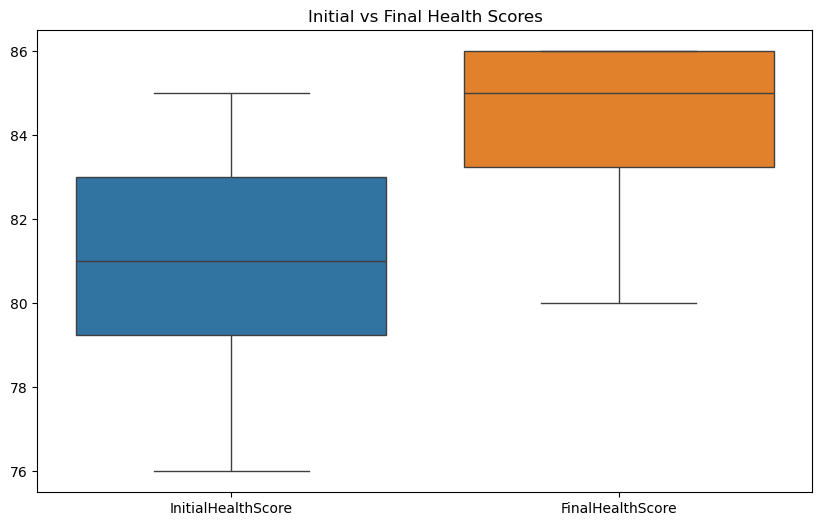

95% confidence interval: [0.7 5.5]
P-value: 0.02921052381549256


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create the DataFrame
data = {
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

df = pd.DataFrame(data)

# Save it as a CSV file
df.to_csv('vaccine_data.csv', index=False)


# Set seed for reproducibility
np.random.seed(42)

# Read data
df = pd.read_csv('vaccine_data.csv')

# Calculate difference between Final and Initial Health Scores
df['ScoreDifference'] = df['FinalHealthScore'] - df['InitialHealthScore']

# Visualize the initial and final health scores
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['InitialHealthScore', 'FinalHealthScore']])
plt.title('Initial vs Final Health Scores')
plt.show()

# Bootstrapping
n_iterations = 1000
bootstrap_means = []
for _ in range(n_iterations):
    bootstrap_sample = df['ScoreDifference'].sample(frac=1, replace=True)
    bootstrap_means.append(bootstrap_sample.mean())

# Calculate 95% confidence interval
conf_interval = np.percentile(bootstrap_means, [2.5, 97.5])
print(f"95% confidence interval: {conf_interval}")

# Perform hypothesis test (Paired t-test or non-parametric test)
from scipy.stats import ttest_rel
stat, p_value = ttest_rel(df['FinalHealthScore'], df['InitialHealthScore'])
print(f"P-value: {p_value}")


We can confidently conclude that the vaccine has a statistically significant positive effect on patients' health scores. The data suggests that the vaccine is effective, leading to an improvement in health with a mean difference between 0.7 and 5.5 points.

## Summary

### Summary of Interactions

#### 1. **Vaccine Data Analysis Overview**  
You are working on a vaccine data analysis assignment for AliTech, where you aim to determine whether the vaccine improves patients' health scores using bootstrapping and hypothesis testing. The dataset includes patients' initial and final health scores, with deliverables focused on:
- Data visualization
- Quantitative analysis
- Null hypothesis testing (no effect)

#### 2. **Steps to Create and Read CSV Files**  
You were provided guidance on how to:
- Create a CSV file containing the vaccine data manually or programmatically using Python and the `pandas` library.
- Read the CSV file into Python for analysis using `pd.read_csv()`.

#### 3. **Quantitative Analysis Explanation**  
Quantitative analysis was explained as the process of analyzing measurable and numerical data, in this case, the difference between initial and final health scores. You will use statistical techniques like bootstrapping to generate a confidence interval and perform hypothesis testing to evaluate the vaccine's effectiveness.

#### 4. **Statistical Results Interpretation**  
You were presented with statistical results:
- **95% Confidence Interval**: [0.7, 5.5]  
   This indicates that the true mean difference in health scores lies between 0.7 and 5.5, suggesting a significant positive effect of the vaccine.
  
- **P-value**: 0.029  
   Since the p-value is below 0.05, this suggests there is statistically significant evidence to reject the null hypothesis of "no effect," meaning the vaccine is effective.

#### 5. **Conclusion**  
The conclusion was that based on both the confidence interval and the p-value, the vaccine has a statistically significant positive impact on health scores. There is strong evidence to suggest that the vaccine is effective at improving health.

This summary of our interactions can be submitted as a record of your work on the assignment, outlining the key concepts and analyses discussed.

## Link

https://chatgpt.com/share/66fae429-584c-8010-8916-243518c9260f

# Question 9

Yes